In [11]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

In [2]:
data_unida= pd.read_csv('dataset_para_modelar.csv')

C:\Users\Alfon\AppData\Local\Temp\ipykernel_10748\4157939819.py:1: DtypeWarning: Columns (5,9,11) have mixed types. Specify dtype option on import or set low_memory=False.
  data_unida= pd.read_csv('dataset_para_modelar.csv')


In [3]:
data_unida=data_unida.iloc[:,1:]
data_unida.shape
data_unida=data_unida.sort_values(by=['cod_persona','mes']).reset_index()
data_unida.drop('index',axis=1,inplace=True)

In [4]:
data_unida.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634682 entries, 0 to 634681
Data columns (total 48 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   cod_persona            634682 non-null  int64  
 1   mes                    634682 non-null  object 
 2   pais                   634626 non-null  object 
 3   sexo                   634617 non-null  object 
 4   edad                   634682 non-null  object 
 5   fecha1                 634626 non-null  object 
 6   xti_empleado           634626 non-null  object 
 7   xti_nuevo_cliente      634626 non-null  float64
 8   num_antiguedad         634682 non-null  object 
 9   xti_rel                634626 non-null  float64
 10  fec_ult_cli_1t         36 non-null      object 
 11  xti_rel_1mes           629040 non-null  float64
 12  tip_rel_1mes           629040 non-null  object 
 13  indresi                634626 non-null  object 
 14  indext                 634626 non-nu

In [5]:
data_unida.isna().sum()

cod_persona                   0
mes                           0
pais                         56
sexo                         65
edad                          0
fecha1                       56
xti_empleado                 56
xti_nuevo_cliente            56
num_antiguedad                0
xti_rel                      56
fec_ult_cli_1t           634646
xti_rel_1mes               5642
tip_rel_1mes               5642
indresi                      56
indext                       56
des_canal                  7178
xti_extra                    56
tip_dom                      56
cod_provincia              2946
xti_actividad_cliente        56
imp_renta                124164
id_segmento                7403
mean_engagement            5642
ind_prod1                     0
ind_prod2                     0
ind_prod3                     0
ind_prod4                     0
ind_prod5                     0
ind_prod6                     0
ind_prod7                     0
ind_prod8                     0
ind_prod

In [8]:
#Creación de la lista negra
lista_negra = data_unida[data_unida['pais'].isnull()]
data_unida = data_unida[~data_unida['pais'].isnull()]

In [9]:
lista_negra

,cod_persona,mes,pais,sexo,edad,fecha1,xti_empleado,xti_nuevo_cliente,num_antiguedad,xti_rel,...,ind_prod16,ind_prod17,ind_prod18,ind_prod19,ind_prod20,ind_prod21,ind_prod22,ind_prod23,ind_prod24,ind_prod25
49307,170635,2015-02-28,NaN,NaN,NA,NaN,NaN,NaN,NA,NaN,...,0,0,0,0,0,0,0.0,0.0,0,0
49308,170635,2015-03-28,NaN,NaN,NA,NaN,NaN,NaN,NA,NaN,...,0,0,0,0,0,0,0.0,0.0,0,0
49309,170635,2015-04-28,NaN,NaN,NA,NaN,NaN,NaN,NA,NaN,...,0,0,0,0,0,0,0.0,0.0,0,0
49310,170635,2015-05-28,NaN,NaN,NA,NaN,NaN,NaN,NA,NaN,...,0,0,0,0,0,0,0.0,0.0,0,0
49311,170635,2015-06-28,NaN,NaN,NA,NaN,NaN,NaN,NA,NaN,...,0,0,0,0,0,0,NaN,NaN,0,0
55686,183684,2015-01-28,NaN,NaN,NA,NaN,NaN,NaN,NA,NaN,...,0,0,0,0,0,0,NaN,NaN,0,0
67982,205901,2015-01-28,NaN,NaN,NA,NaN,NaN,NaN,NA,NaN,...,0,0,0,0,0,0,NaN,NaN,0,0
71155,210920,2015-01-28,NaN,NaN,NA,NaN,NaN,NaN,NA,NaN,...,0,0,0,0,0,0,0.0,0.0,0,0
71156,210920,2015-02-28,NaN,NaN,NA,NaN,NaN,NaN,NA,NaN,...,0,0,0,0,0,0,0.0,0.0,0,0
71157,210920,2015-03-28,NaN,NaN,NA,NaN,NaN,NaN,NA,NaN,...,0,0,0,0,0,0,NaN,NaN,0,0


In [30]:
data_unida.isna().sum()

cod_persona                   0
mes                           0
pais                          0
sexo                          0
edad                          0
fecha1                        0
xti_empleado                  0
xti_nuevo_cliente             0
num_antiguedad                0
xti_rel                       0
tip_rel_1mes                  0
indresi                       0
indext                        0
des_canal                  7122
xti_extra                     0
tip_dom                       0
cod_provincia                 0
xti_actividad_cliente         0
imp_renta                124108
id_segmento                7347
mean_engagement            5586
ind_prod1                     0
ind_prod2                     0
ind_prod3                     0
ind_prod4                     0
ind_prod5                     0
ind_prod6                     0
ind_prod7                     0
ind_prod8                     0
ind_prod9                     0
ind_prod10                    0
ind_prod

In [6]:
#Eliminacion de la columna fec_ult_cli_1t porque solo tiene 40 no nulos.
data_unida.drop('fec_ult_cli_1t',axis=1,inplace=True)

In [17]:
#Imputamos el sexo con la moda, que es 'V'
data_unida['sexo'] = data_unida['sexo'].fillna('V')

In [19]:
#Codigo de provincia
paises=list(data_unida['pais'].unique())
paises.remove('ES')
map_paises={valor:100+i for i,valor in enumerate(paises)}
data_unida['cod_provincia']=data_unida[['cod_provincia','pais']].apply(lambda x:map_paises[x.pais]  if x.pais!='ES' else x.cod_provincia,axis=1)
prov_imputer=SimpleImputer(strategy='most_frequent')
data_unida['cod_provincia']=prov_imputer.fit_transform(data_unida[['cod_provincia']])

In [27]:
frecuencia_valores = data_unida['xti_rel_1mes'].value_counts()

# Mostrar la frecuencia de los valores únicos
print(frecuencia_valores)

xti_rel_1mes
1.0    628777
3.0       158
2.0        53
0.0        39
4.0        13
Name: count, dtype: int64


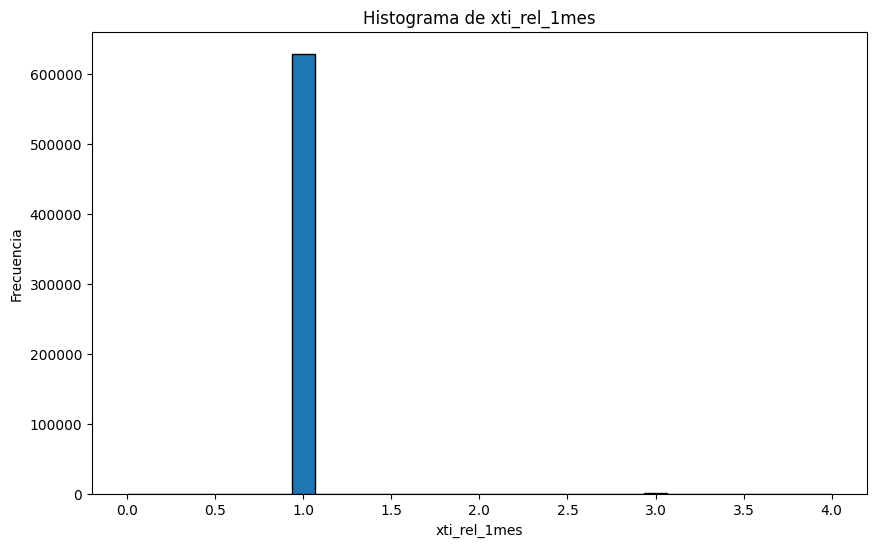

In [23]:
plt.figure(figsize=(10, 6))
plt.hist(data_unida['xti_rel_1mes'], bins=30, edgecolor='k')
plt.title('Histograma de xti_rel_1mes')
plt.xlabel('xti_rel_1mes')
plt.ylabel('Frecuencia')
plt.show()

In [28]:
#Poca varianza eliminamos la variable xti_rel_1mes
data_unida['xti_rel_1mes'].value_counts()
data_unida.drop('xti_rel_1mes',axis=1,inplace=True)

tip_rel_1mes
I    340711
A    288119
N      5586
P       171
R        39
Name: count, dtype: int64


<Axes: xlabel='tip_rel_1mes', ylabel='count'>

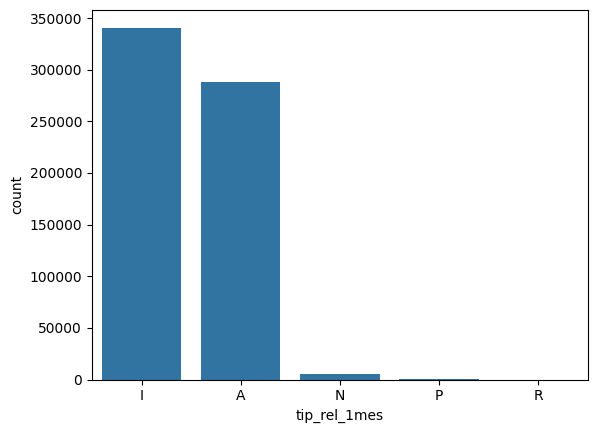

In [29]:
#Rellenamos nulos en la variable 'tip_rel_1mes' con una nueva categoria 'N'
data_unida['tip_rel_1mes'].fillna('N',inplace=True)
print(data_unida['tip_rel_1mes'].value_counts())
sns.barplot(data_unida['tip_rel_1mes'].value_counts())

In [31]:
#Creamos una nueva categoria '04-NO TIENE' para la columna id_segmento
data_unida['id_segmento'].fillna('04-NO TIENE',inplace=True)

In [32]:
#Para la columna imp_renta transformamos con logaritmo para converitr a distibucion normal e imputamos con la media
data_unida['imp_renta']=np.log(data_unida['imp_renta'])
imp_imputer=SimpleImputer(strategy='mean')
data_unida['imp_renta']=imp_imputer.fit_transform(data_unida[['imp_renta']])

In [33]:
#Rellenamos con mediana, no tenemos informacion para eliminar outliers
eng_imputer=SimpleImputer(strategy='median')
data_unida['mean_engagement']=eng_imputer.fit_transform(data_unida[['mean_engagement']])

In [ ]:
#Rellenamos los valores de los productos con el valor anterior
data_unida['ind_prod22'] = data_unida['ind_prod22'].fillna(method='ffill')
data_unida['ind_prod23'] = data_unida['ind_prod23'].fillna(method='ffill')

In [37]:
data_unida.isna().sum()

cod_persona                 0
mes                         0
pais                        0
sexo                        0
edad                        0
fecha1                      0
xti_empleado                0
xti_nuevo_cliente           0
num_antiguedad              0
xti_rel                     0
tip_rel_1mes                0
indresi                     0
indext                      0
des_canal                7122
xti_extra                   0
tip_dom                     0
cod_provincia               0
xti_actividad_cliente       0
imp_renta                   0
id_segmento                 0
mean_engagement             0
ind_prod1                   0
ind_prod2                   0
ind_prod3                   0
ind_prod4                   0
ind_prod5                   0
ind_prod6                   0
ind_prod7                   0
ind_prod8                   0
ind_prod9                   0
ind_prod10                  0
ind_prod11                  0
ind_prod12                  0
ind_prod13

Para k = 2 , el coste (SSE)= 804930154.2696893
Para k = 3 , el coste (SSE)= 489408207.3725157
Para k = 4 , el coste (SSE)= 408867366.6602108
Para k = 5 , el coste (SSE)= 363939586.51913637
Para k = 6 , el coste (SSE)= 303398693.97112703
Para k = 7 , el coste (SSE)= 286667022.5301325
Para k = 8 , el coste (SSE)= 259194894.77028397
Para k = 9 , el coste (SSE)= 243107750.05892757
Para k = 10 , el coste (SSE)= 226250743.4120057


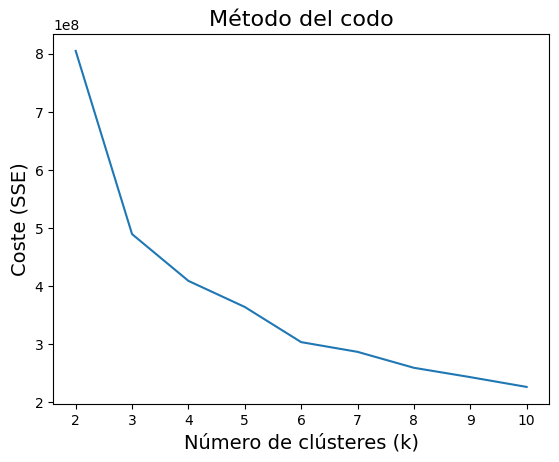

ValueError: Input X contains NaN.
KMeans does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [35]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import OrdinalEncoder

data_unida_cluster=data_unida.copy()
data_unida_cluster=data_unida_cluster[~data_unida_cluster['xti_rel'].isna()]
data_unida_cluster.drop('des_canal',axis=1,inplace=True)
label_encoder = OrdinalEncoder()
data_unida_cluster['edad']=data_unida_cluster['edad'].astype(int)
data_unida_cluster.drop(['mes','fecha1'],axis=1,inplace=True)
data_unida_cluster['num_antiguedad']=data_unida_cluster['num_antiguedad'].astype(int)
cat_cols=data_unida_cluster.select_dtypes(include='O').columns
data_unida_cluster[cat_cols] = label_encoder.fit_transform(data_unida_cluster[cat_cols])
data_cluster=data_unida_cluster.iloc[:,:18]
data_cluster.drop('cod_persona',axis=1,inplace=True)
# Aplicar LabelEncoder a la columna 'colores'
# definimos la n-tupla donde ordenaderemos los sucesivos valores de SSE
# hallados para cada valor de k
Coste = []
krange = np.arange(2, 11) #krange = 2,3,4,5,6,7,8,9,10
# bucle para el cálculo de la función de coste (SSE) desde k= 2 hasta k= 10
for num in krange:
    kmeans = KMeans(n_clusters=num, n_init='auto', random_state=10, max_iter=100).fit(data_cluster)
    print(
        "Para k =",
        num,
        ', el coste (SSE)=',
        kmeans.inertia_,
    )
    Coste.append(kmeans.inertia_)

fig, ax = plt.subplots()
ax.set_title('Método del codo', fontsize = 16)
ax.set_ylabel("Coste (SSE)",fontsize=14)
ax.set_xlabel("Número de clústeres (k)", fontsize=14)
ax.plot(krange,Coste)
plt.show()

from sklearn.metrics import silhouette_samples,silhouette_score
#Importamos librerías específicas para este análsis de Silhouette
#Se ha adaptado el código https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html
import matplotlib.cm as cm
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
silhouette_scores = []
for n_clusters in range_n_clusters:
    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, n_init="auto", random_state=10)
    cluster_labels = clusterer.fit_predict(data_unida_cluster)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(data_unida_cluster, cluster_labels)
    print(
        "Para k =",
        n_clusters,
        ", S =",
        silhouette_avg,
    )

from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score

for k in [2,3,4,5,6]:
    kmeans = KMeans(n_clusters=k, n_init= 'auto', random_state=10, max_iter=3000)
    Y_pred=kmeans.fit_predict(data_cluster) # Vector de asignación de etiquetas predichas para cada elemento
    data_cluster['id_cluster']=kmeans.labels_
    muestra=data_cluster.sample(round(0.1*len(data_cluster)))
    silhouette_avg = silhouette_score(muestra.drop('id_cluster',axis=1),muestra['id_cluster'])
    cal=calinski_harabasz_score(muestra.drop('id_cluster',axis=1),muestra['id_cluster'])
    print('\nPara un Nº de clusters: ',k ,
          '\nS: ',silhouette_avg,
          '\nCH: ',cal)
    print('-'*50)

k_val=3
kmeans = KMeans(n_clusters=k_val, n_init= 'auto', random_state=10, max_iter=3000)
Y_pred=kmeans.fit_predict(data_cluster) # Vector de asignación de etiquetas predichas para cada elemento
print(Y_pred)
kmeans.labels_
data_cluster['id_cluster']=kmeans.labels_
#Boxplot con el comportamiento de los clusters para cada variable (Facilitar la caracterización)
for col in data_cluster.columns:
    sns.boxplot(data_cluster,x=col,hue='id_cluster')
    plt.show()

data_unida['id_cluster']=data_cluster['id_cluster'].copy()
sns.barplot(data_unida[data_unida['des_canal'].isna()]['id_cluster'].value_counts())

map_des_canal={}
for i in data_unida['id_cluster'].dropna().unique():
    map_des_canal[i]=data_unida[data_unida['id_cluster']==i]['des_canal'].mode()[0]
map_des_canal
data_des_canal_nan=data_unida.loc[data_unida['des_canal'].isna()]
data_des_canal_nan['des_canal']=data_des_canal_nan['id_cluster'].map(map_des_canal)
data_unida.loc[data_unida['des_canal'].isna()]=data_des_canal_nan

In [ ]:
#Hasta aqui, arregla si puedes lo del cluster para 'des_canal' plis

In [21]:
#Separamos las variables en categóricas y numéricas
cat=[]
num=[]
for i in data_unida.columns:
  if data_unida[i].dtype=='object':
    cat.append(i)
  else:
    num.append(i)
print('cat = ',cat)
print('num = ',num)

cat =  ['mes', 'pais', 'sexo', 'edad', 'fecha1', 'xti_empleado', 'num_antiguedad', 'tip_rel_1mes', 'indresi', 'indext', 'des_canal', 'xti_extra', 'id_segmento']
num =  ['cod_persona', 'xti_nuevo_cliente', 'xti_rel', 'xti_rel_1mes', 'tip_dom', 'cod_provincia', 'xti_actividad_cliente', 'imp_renta', 'mean_engagement', 'ind_prod1', 'ind_prod2', 'ind_prod3', 'ind_prod4', 'ind_prod5', 'ind_prod6', 'ind_prod7', 'ind_prod8', 'ind_prod9', 'ind_prod10', 'ind_prod11', 'ind_prod12', 'ind_prod13', 'ind_prod14', 'ind_prod15', 'ind_prod16', 'ind_prod17', 'ind_prod18', 'ind_prod19', 'ind_prod20', 'ind_prod21', 'ind_prod22', 'ind_prod23', 'ind_prod24', 'ind_prod25']



Descripcion de la variable  mes
--------------------------------------------------
Categorías:
mes
2016-04-28    46776
2016-03-28    46549
2016-02-28    46287
2016-01-28    45994
2015-12-28    45675
2015-11-28    45309
2015-10-28    44574
2015-09-28    43170
2015-08-28    42016
2015-07-28    41342
2015-06-28    31426
2015-05-28    31331
2015-04-28    31243
2015-03-28    31127
2015-02-28    30975
2015-01-28    30832
Name: count, dtype: int64
Número de categorias:  16


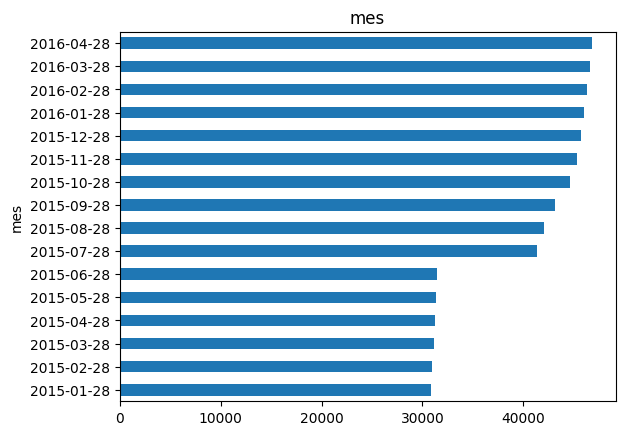


Descripcion de la variable  pais
--------------------------------------------------
Categorías:
pais
ES    631736
DE       285
GB       244
FR       224
US       203
CH       192
CO       160
AR       144
IT       138
MX       122
RO       104
EC        90
VE        80
CL        74
PY        74
BE        64
BR        52
AT        48
CA        48
NL        32
CN        32
PL        32
FI        32
BG        32
PE        32
BO        26
CU        16
UA        16
GE        16
PA        16
NG        16
NZ        16
JP        16
AD        16
SE        16
GN        16
IL        16
SA        16
PR        16
PK        16
GT        16
PT        16
SV        16
IN        16
AU        11
RU        10
MD        10
HU         7
Name: count, dtype: int64
Número de categorias:  48


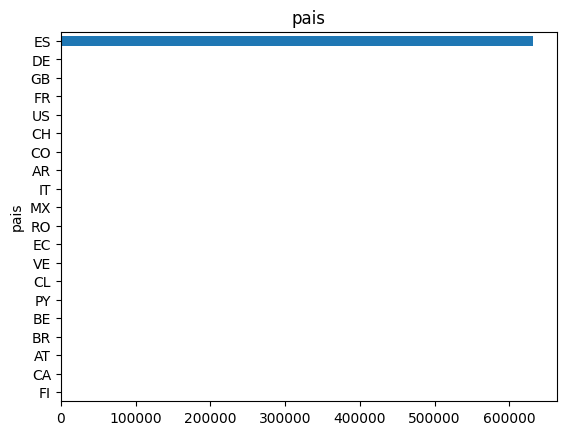


Descripcion de la variable  sexo
--------------------------------------------------
Categorías:
sexo
V    346854
H    287772
Name: count, dtype: int64
Número de categorias:  2


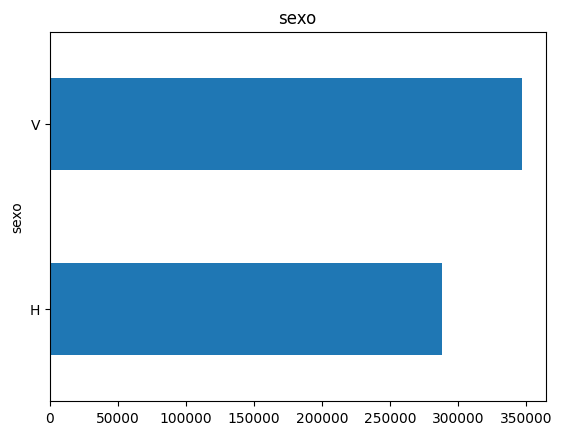


Descripcion de la variable  edad
--------------------------------------------------
Categorías:
edad
23     25095
22     23936
24     23416
21     22674
20     17530
       ...  
2         10
108        8
109        8
105        6
103        5
Name: count, Length: 215, dtype: int64
Número de categorias:  215


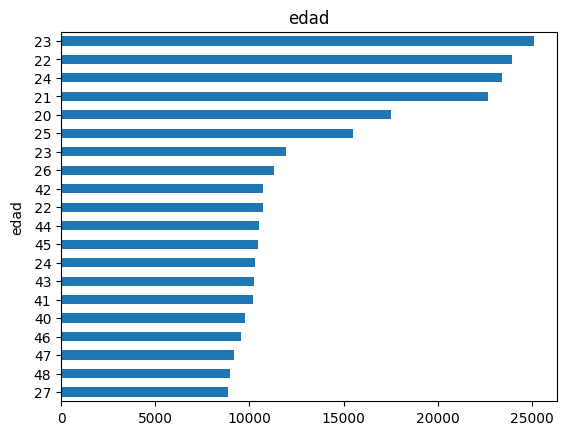


Descripcion de la variable  fecha1
--------------------------------------------------
Categorías:
fecha1
2014-10-03    2907
2014-07-28    2516
2014-08-04    2385
2013-10-14    2046
2012-08-03    1443
              ... 
2016-03-19       2
2008-06-07       2
2016-04-17       1
2016-04-16       1
2016-04-09       1
Name: count, Length: 5796, dtype: int64
Número de categorias:  5796


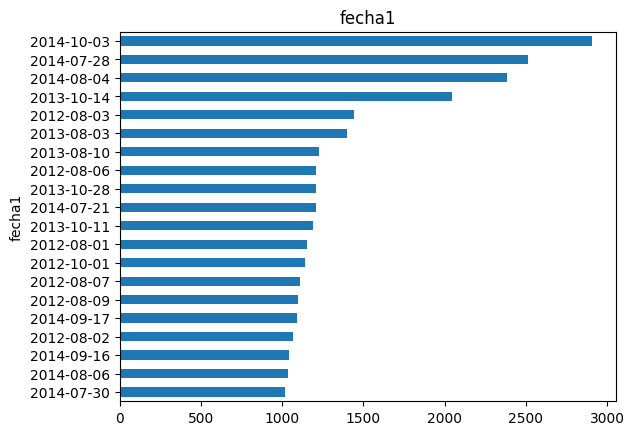


Descripcion de la variable  xti_empleado
--------------------------------------------------
Categorías:
xti_empleado
N    634158
A       202
B       170
F        96
Name: count, dtype: int64
Número de categorias:  4


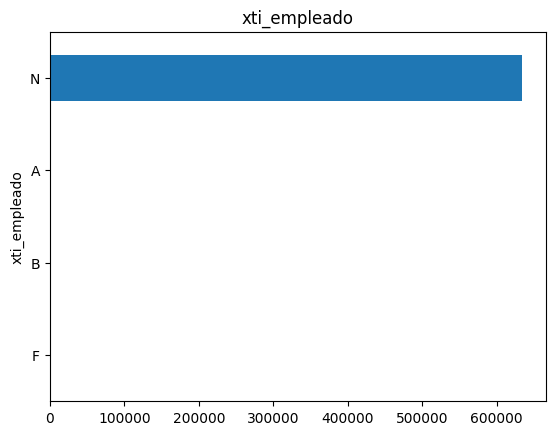


Descripcion de la variable  num_antiguedad
--------------------------------------------------
Categorías:
num_antiguedad
12         6383
1          6182
0          6028
3          5901
2          5868
           ... 
    246      18
    244      12
253          11
254           9
255           3
Name: count, Length: 502, dtype: int64
Número de categorias:  502


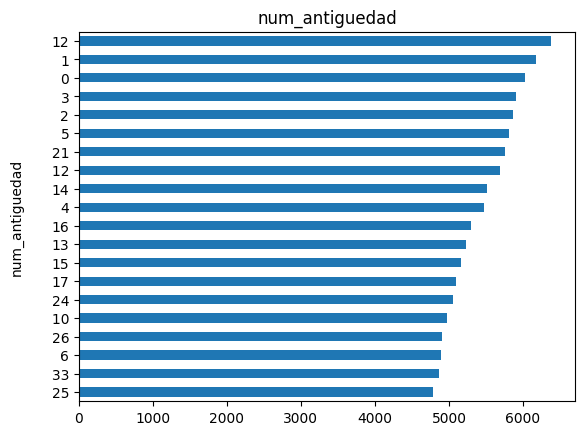


Descripcion de la variable  tip_rel_1mes
--------------------------------------------------
Categorías:
tip_rel_1mes
I    340711
A    288119
P       171
R        39
Name: count, dtype: int64
Número de categorias:  4


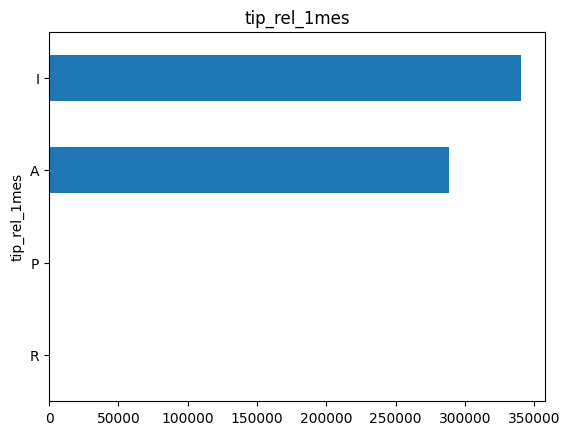


Descripcion de la variable  indresi
--------------------------------------------------
Categorías:
indresi
S    631736
N      2890
Name: count, dtype: int64
Número de categorias:  2


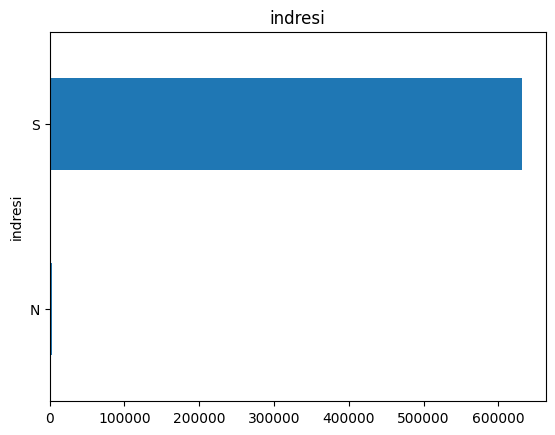


Descripcion de la variable  indext
--------------------------------------------------
Categorías:
indext
N    604219
S     30407
Name: count, dtype: int64
Número de categorias:  2


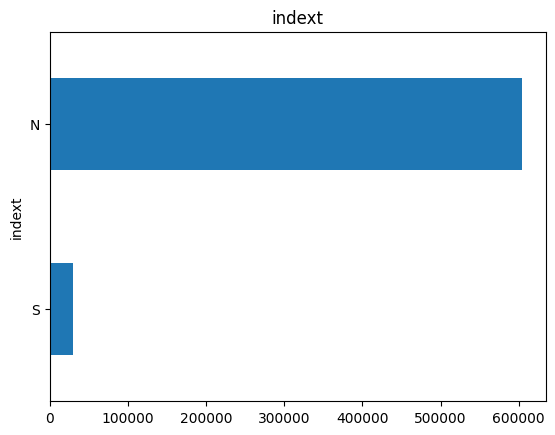


Descripcion de la variable  des_canal
--------------------------------------------------
Categorías:
des_canal
KHE    191157
KAT    152054
KFC    146716
KHQ     25773
KFA     18941
        ...  
KCP        10
KDV        10
KFM        10
K00        10
KCO        10
Name: count, Length: 126, dtype: int64
Número de categorias:  126


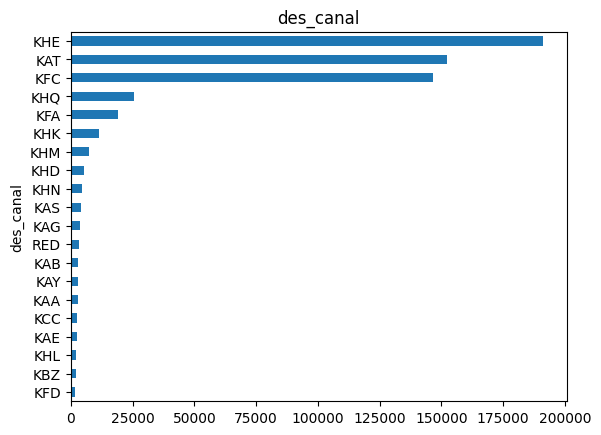


Descripcion de la variable  xti_extra
--------------------------------------------------
Categorías:
xti_extra
N    633108
S      1518
Name: count, dtype: int64
Número de categorias:  2


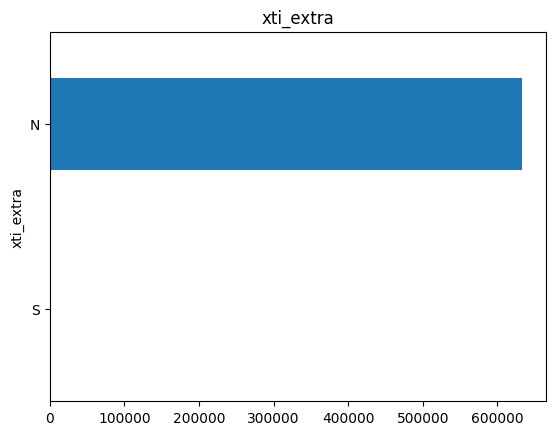


Descripcion de la variable  id_segmento
--------------------------------------------------
Categorías:
id_segmento
02 - PARTICULARES     369955
03 - UNIVERSITARIO    230740
01 - TOP               26584
Name: count, dtype: int64
Número de categorias:  3


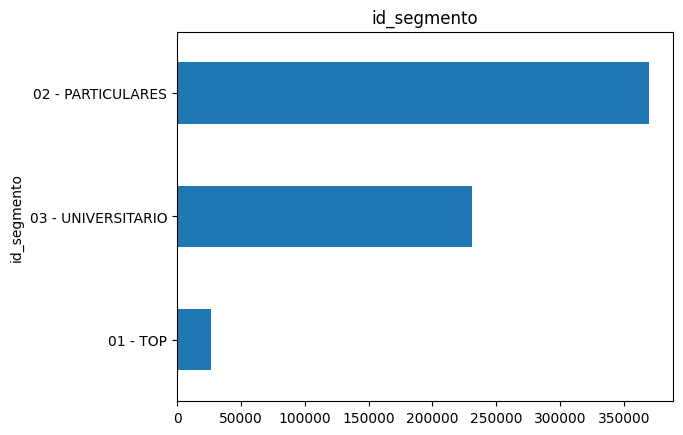

In [22]:
#Visualización variables categóricas
for c in cat:
    print('\nDescripcion de la variable ',c)
    print('-'*50)
    print('Categorías:')
    print(data_unida[c].value_counts())
    print('Número de categorias: ',data_unida[c].nunique())
    data_unida[c].value_counts().sort_values(ascending=True).tail(20).plot(kind='barh')
    plt.title(c)
    plt.show()

In [5]:
# Calcular la moda de la columna 'edad' (excluyendo valores ' NA')
moda_edad = data_unida.loc[data_unida['edad'] != ' NA', 'edad'].mode()[0]
moda_ant = data_unida.loc[data_unida['num_antiguedad'] != ' NA', 'num_antiguedad'].mode()[0]

# Reemplazar los valores ' NA' en la columna 'edad' con la moda
data_unida.loc[data_unida['edad'] == ' NA', 'edad'] = moda_edad
data_unida.loc[data_unida['num_antiguedad'] == ' NA', 'num_antiguedad'] = moda_ant

In [6]:
data=data_unida[~data_unida['fecha1'].isna()]
data['edad']=data['edad'].astype(float)
data['num_antiguedad']=data['num_antiguedad'].astype(float)
data['fecha1'] = pd.to_datetime(data['fecha1'])
data['mes'] = pd.to_datetime(data['mes'])

C:\Users\Alfon\AppData\Local\Temp\ipykernel_5656\3402631540.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['edad']=data['edad'].astype(float)
C:\Users\Alfon\AppData\Local\Temp\ipykernel_5656\3402631540.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['num_antiguedad']=data['num_antiguedad'].astype(float)
C:\Users\Alfon\AppData\Local\Temp\ipykernel_5656\3402631540.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col

In [7]:
#Separamos las variables en categóricas y numéricas
cat=[]
num=[]
for i in data.columns:
  if data[i].dtype=='object':
    cat.append(i)
  else:
    num.append(i)
print('cat = ',cat)
print('num = ',num)

cat =  ['pais', 'sexo', 'xti_empleado', 'fec_ult_cli_1t', 'tip_rel_1mes', 'indresi', 'indext', 'des_canal', 'xti_extra', 'id_segmento']
num =  ['Unnamed: 0', 'cod_persona', 'mes', 'edad', 'fecha1', 'xti_nuevo_cliente', 'num_antiguedad', 'xti_rel', 'xti_rel_1mes', 'tip_dom', 'cod_provincia', 'xti_actividad_cliente', 'imp_renta', 'mean_engagement', 'ind_prod1', 'ind_prod2', 'ind_prod3', 'ind_prod4', 'ind_prod5', 'ind_prod6', 'ind_prod7', 'ind_prod8', 'ind_prod9', 'ind_prod10', 'ind_prod11', 'ind_prod12', 'ind_prod13', 'ind_prod14', 'ind_prod15', 'ind_prod16', 'ind_prod17', 'ind_prod18', 'ind_prod19', 'ind_prod20', 'ind_prod21', 'ind_prod22', 'ind_prod23', 'ind_prod24', 'ind_prod25']



Descripcion de la variable  pais
--------------------------------------------------
Categorías:
pais
ES    631736
DE       285
GB       244
FR       224
US       203
CH       192
CO       160
AR       144
IT       138
MX       122
RO       104
EC        90
VE        80
CL        74
PY        74
BE        64
BR        52
AT        48
CA        48
FI        32
NL        32
PL        32
CN        32
PE        32
BG        32
BO        26
GT        16
PK        16
PT        16
GN        16
PR        16
JP        16
IL        16
SA        16
NG        16
NZ        16
IN        16
AD        16
UA        16
SE        16
GE        16
CU        16
PA        16
SV        16
AU        11
MD        10
RU        10
HU         7
Name: count, dtype: int64
Número de categorias:  48


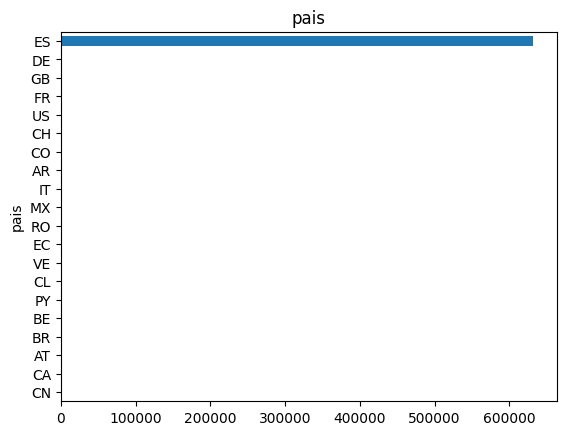


Descripcion de la variable  sexo
--------------------------------------------------
Categorías:
sexo
V    346845
H    287772
Name: count, dtype: int64
Número de categorias:  2


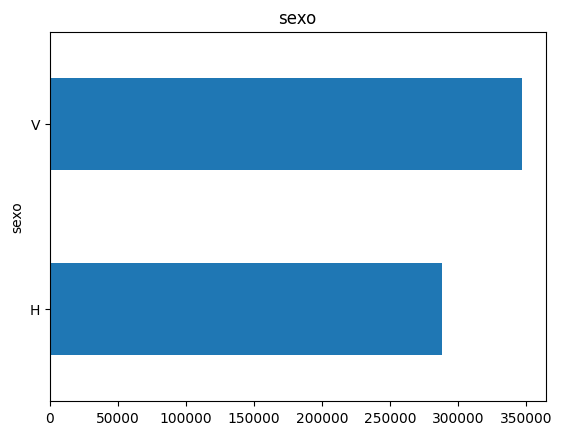


Descripcion de la variable  xti_empleado
--------------------------------------------------
Categorías:
xti_empleado
N    634158
A       202
B       170
F        96
Name: count, dtype: int64
Número de categorias:  4


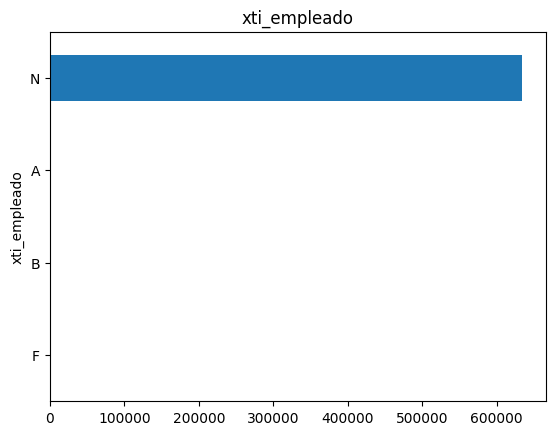


Descripcion de la variable  fec_ult_cli_1t
--------------------------------------------------
Categorías:
fec_ult_cli_1t
2015-07-30    7
2015-07-28    7
2015-12-24    3
2015-11-02    2
2015-10-02    2
2016-02-16    1
2016-02-04    1
2016-01-12    1
2015-12-28    1
2015-12-17    1
2015-11-24    1
2015-10-01    1
2015-10-07    1
2015-09-15    1
2015-09-24    1
2015-09-01    1
2015-08-28    1
2015-08-24    1
2015-08-06    1
2016-04-01    1
Name: count, dtype: int64
Número de categorias:  20


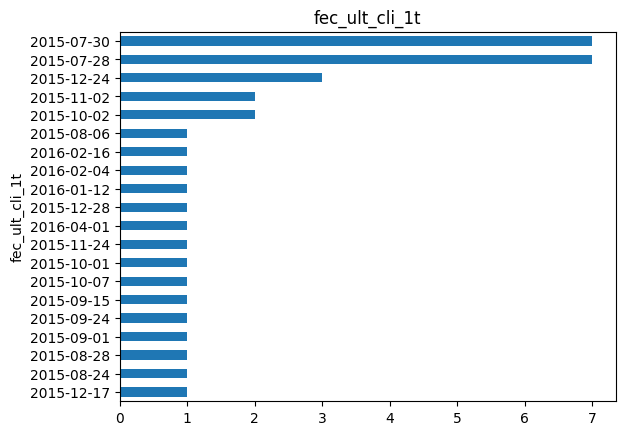


Descripcion de la variable  tip_rel_1mes
--------------------------------------------------
Categorías:
tip_rel_1mes
I    340711
A    288119
P       171
R        39
Name: count, dtype: int64
Número de categorias:  4


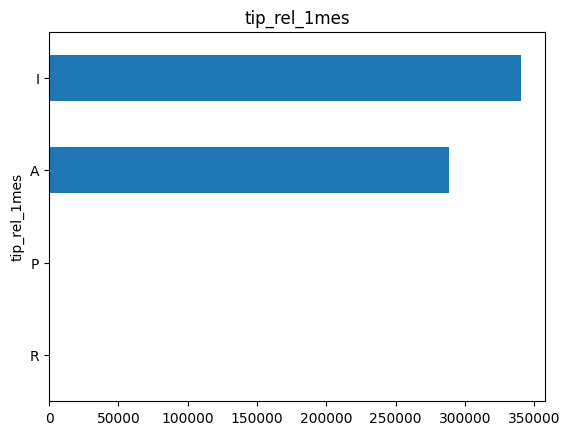


Descripcion de la variable  indresi
--------------------------------------------------
Categorías:
indresi
S    631736
N      2890
Name: count, dtype: int64
Número de categorias:  2


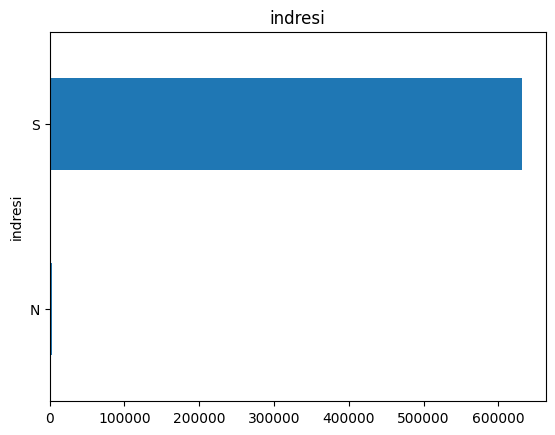


Descripcion de la variable  indext
--------------------------------------------------
Categorías:
indext
N    604219
S     30407
Name: count, dtype: int64
Número de categorias:  2


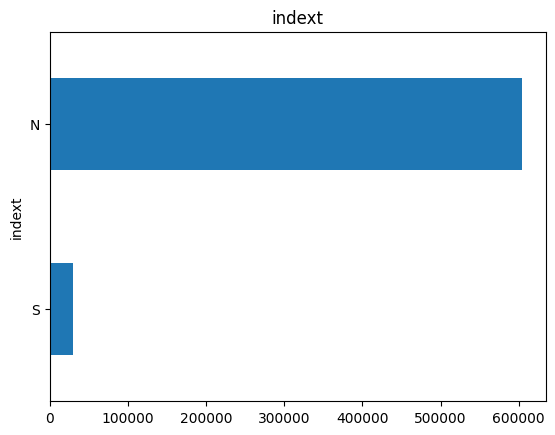


Descripcion de la variable  des_canal
--------------------------------------------------
Categorías:
des_canal
KHE    191157
KAT    152054
KFC    146716
KHQ     25773
KFA     18941
        ...  
KCQ        10
KFM        10
KCP        10
KDV        10
K00        10
Name: count, Length: 126, dtype: int64
Número de categorias:  126


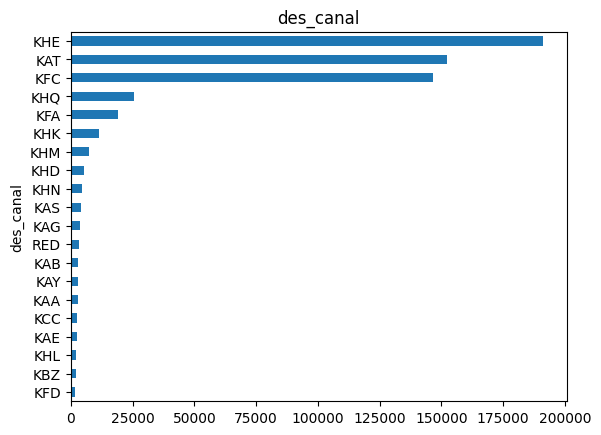


Descripcion de la variable  xti_extra
--------------------------------------------------
Categorías:
xti_extra
N    633108
S      1518
Name: count, dtype: int64
Número de categorias:  2


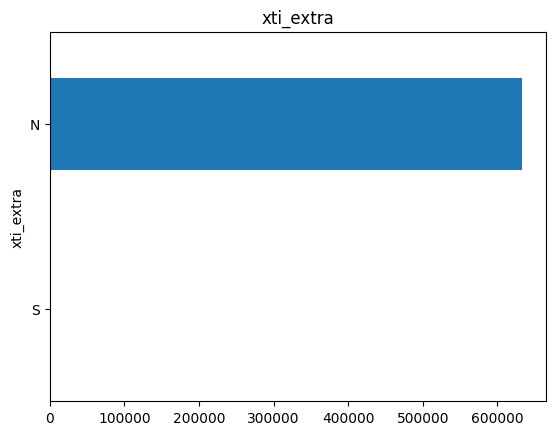


Descripcion de la variable  id_segmento
--------------------------------------------------
Categorías:
id_segmento
02 - PARTICULARES     369955
03 - UNIVERSITARIO    230740
01 - TOP               26584
Name: count, dtype: int64
Número de categorias:  3


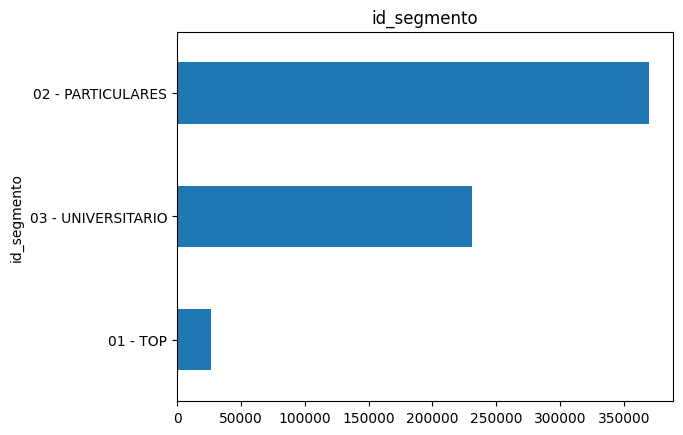

In [8]:
#Visualización variables categóricas
for c in cat:
    print('\nDescripcion de la variable ',c)
    print('-'*50)
    print('Categorías:')
    print(data[c].value_counts())
    print('Número de categorias: ',data[c].nunique())
    data[c].value_counts().sort_values(ascending=True).tail(20).plot(kind='barh')
    plt.title(c)
    plt.show()

In [9]:
data['pais'] = data['pais'].apply(lambda x: 1 if x == 'ES' else 0)

C:\Users\Alfon\AppData\Local\Temp\ipykernel_5656\1484669705.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['pais'] = data['pais'].apply(lambda x: 1 if x == 'ES' else 0)


In [10]:
data['sexo'] = data['sexo'].apply(lambda x: 1 if x == 'V' else 0)

C:\Users\Alfon\AppData\Local\Temp\ipykernel_5656\2237752613.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['sexo'] = data['sexo'].apply(lambda x: 1 if x == 'V' else 0)
